# Resume Parsing

## 1. Load data

In [1]:
import pandas as pd
import numpy as np

df_resume = pd.read_csv("Resume.csv")
df_resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [2]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [3]:
df_resume.shape

(2484, 4)

In [4]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume

,ID,Resume_str,Resume_html,Category
1488,20705888,FINANCE OFFICER Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
1229,10515955,DIGITAL MEDIA SALES CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
2368,82738323,AVIATION MECHANIC Skills ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2396,90318913,MECHANICAL ENGINEER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
521,17847636,CUSTOMER SERVICE AGENT Prof...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
...,...,...,...,...
2347,26410763,GAME DESIGN INTERN Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
140,16288901,INTERIOR DESIGNER OBJECTIVE ...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER
177,14528265,PROJECT MANAGER/CAD DESIGNER ...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER
504,15337481,CUSTOMER SERVICE ADVOCATE Summa...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE


In [5]:
df_resume = df_resume.copy().iloc[:1000, ]
df_resume

,ID,Resume_str,Resume_html,Category
1488,20705888,FINANCE OFFICER Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
1229,10515955,DIGITAL MEDIA SALES CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
2368,82738323,AVIATION MECHANIC Skills ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2396,90318913,MECHANICAL ENGINEER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
521,17847636,CUSTOMER SERVICE AGENT Prof...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
...,...,...,...,...
489,72652441,CUSTOMER CARE ADVOCATE Experi...,"<div class=""skn-upt1 fontsize fontface vmargin...",ADVOCATE
1035,10603337,SALES ASSOCIATE Experienc...,"<div class=""fontsize fontface vmargins hmargin...",SALES
2349,27096796,DANCE INSTRUCTOR Summary En...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
529,47133747,PATIENT EXPERIENCE MANAGER Summ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE


In [6]:
df_resume.shape

(1000, 4)

## 2. Load skill data

If we define patterns for all the skill, we gonna be too tired.

So spacy knows that, so it allows you to give you a list of words, then it will automatically create pattern.

In [7]:
import spacy

nlp        = spacy.load('en_core_web_md')
ruler = nlp.add_pipe("entity_ruler")


/home/koala/.local/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/koala/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
skill_path = './app/data/jz_skill_patterns.jsonl'
ruler.from_disk(skill_path) 
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [9]:
doc = nlp("Chaky loves ajax.")
doc.ents

(Chaky, ajax)

In [10]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Chaky NORP
ajax SKILL


## 3. Let's try to extract skills from this resume.csv

In [11]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
1488,20705888,FINANCE OFFICER Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
1229,10515955,DIGITAL MEDIA SALES CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
2368,82738323,AVIATION MECHANIC Skills ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2396,90318913,MECHANICAL ENGINEER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
521,17847636,CUSTOMER SERVICE AGENT Prof...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE


In [12]:
#clean our data

from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sentence):

    stopwords    = list(STOP_WORDS)
    doc          = nlp(sentence)
    clean_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SYM' and \
            token.pos_ != 'SPACE':
                clean_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(clean_tokens)

In [13]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         FINANCE MANAGER           Summary    Assist an organization that can benefit from my extensive experience in Accounting, training auditing, contract bid preparation and negotiations. Over forty years experience in accounting including Controllerships, Accounts Payable, Payroll, Government C'

In [14]:
preprocessing(random_resume[:300])

'finance manager summary assist organization benefit extensive experience accounting training auditing contract bid preparation negotiation over year experience accounting include controllerships accounts payable payroll government c'

In [15]:
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

In [16]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
1488,20705888,FINANCE OFFICER Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE,finance officer professional summary bilingual...
1229,10515955,DIGITAL MEDIA SALES CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital media sale consultant summary dedicate...
2368,82738323,AVIATION MECHANIC Skills ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,aviation mechanic skill license faa rate airfr...
2396,90318913,MECHANICAL ENGINEER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,mechanical engineer summary 5 year 9 month exp...
521,17847636,CUSTOMER SERVICE AGENT Prof...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE,customer service agent professional summary to...


## 4. Let's really extract skills!!

In [17]:
import re
def get_skills(text):
    
    doc = nlp(text)
    
    skills = []
    
    for ent in doc.ents:
        if re.match(r'^SKILL', ent.label_):
            skills.append(ent.text)
            
    return skills

def unique_skills(x):
    return list(set(x))

In [18]:
df_resume = df_resume[:100]

In [19]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

/tmp/ipykernel_374991/138658587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
/tmp/ipykernel_374991/138658587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resume['Skills'] = df_resume.Skills.apply(unique_skills)


In [20]:
df_resume.Skills.iloc[0]

['business', 'passenger', 'finance', 'collaboration', 'vault']

In [21]:
df_resume.Skills.iloc[2]

['component', 'aeronautics', 'schedule', 'support']

In [22]:
df_resume

,ID,Resume_str,Resume_html,Category,Clean_resume,Skills
1488,20705888,FINANCE OFFICER Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE,finance officer professional summary bilingual...,"[business, passenger, finance, collaboration, ..."
1229,10515955,DIGITAL MEDIA SALES CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital media sale consultant summary dedicate...,"[realm, business, advertising, marketing, spring]"
2368,82738323,AVIATION MECHANIC Skills ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,aviation mechanic skill license faa rate airfr...,"[component, aeronautics, schedule, support]"
2396,90318913,MECHANICAL ENGINEER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,mechanical engineer summary 5 year 9 month exp...,"[terminal, mechanical engineering, design, tes..."
521,17847636,CUSTOMER SERVICE AGENT Prof...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE,customer service agent professional summary to...,"[documentation, sorting, queue, compose, workf..."
...,...,...,...,...,...,...
714,10480456,"DIRECTOR, NEW PRODUCT RESEARCH AND R&...","<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,director new product research and r&d liaison ...,"[release, business, project management, throug..."
1047,17509935,SALES ASSOCIATE Summary Out...,"<div class=""fontsize fontface vmargins hmargin...",SALES,sale associate summary outgoing people orient ...,"[business, schedule]"
812,32636041,"PERSONAL TRAINER, GROUP FITNESS INSTR...","<div class=""fontsize fontface vmargins hmargin...",FITNESS,personal trainer group fitness instructor summ...,"[project management, mobile, material, support..."
1182,33919379,CONSULTANT Objective Enthusi...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant objective enthusiastic pharmacist v...,"[business, intercom, interaction, workflow, ma..."


## 5. Visualization

Which skills is most important in information management?

In [23]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [24]:
category = 'INFORMATION-TECHNOLOGY'
cond     = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(5, 6)

In [25]:
all_skills = np.concatenate(df_resume_it.Skills.values)

In [26]:
all_skills

array(['release', 'business', 'project management', 'confluence',
       'design', 'data acquisition', 'framework', 'deployment',
       'workflow', 'schedule', 'supervisory control', 'collaboration',
       'performance metric', 'software', 'support', 'database',
       'specification', 'component', 'support', 'monitoring', 'design',
       'server', 'encryption', 'release', 'wireless', 'testing',
       'computer security', 'operating systems', 'software', 'analytics',
       'project management', 'windows', 'operating system',
       'voice over ip', 'security', 'terminal', 'business', 'design',
       'security', 'windows', 'component', 'testing', 'server',
       'accounting', 'operating system', 'operating systems', 'software',
       'support', 'skype', 'publishing', 'business', 'documentation',
       'diagram', 'design', 'electronic engineering', 'framework',
       'deployment', 'windows', 'collaboration', 'engineering',
       'software', 'linux', 'support', 'security', 'bus

In [27]:
from collections import Counter, OrderedDict

counting = Counter(all_skills)
counting

Counter({'design': 5,
         'software': 5,
         'support': 5,
         'business': 4,
         'project management': 3,
         'server': 3,
         'windows': 3,
         'security': 3,
         'release': 2,
         'framework': 2,
         'deployment': 2,
         'schedule': 2,
         'collaboration': 2,
         'component': 2,
         'monitoring': 2,
         'testing': 2,
         'operating systems': 2,
         'operating system': 2,
         'accounting': 2,
         'documentation': 2,
         'linux': 2,
         'confluence': 1,
         'data acquisition': 1,
         'workflow': 1,
         'supervisory control': 1,
         'performance metric': 1,
         'database': 1,
         'specification': 1,
         'encryption': 1,
         'wireless': 1,
         'computer security': 1,
         'analytics': 1,
         'voice over ip': 1,
         'terminal': 1,
         'skype': 1,
         'publishing': 1,
         'diagram': 1,
         'electronic engine

In [28]:
counting = OrderedDict(counting.most_common(10))

In [29]:
counting

OrderedDict([('design', 5),
             ('software', 5),
             ('support', 5),
             ('business', 4),
             ('project management', 3),
             ('server', 3),
             ('windows', 3),
             ('security', 3),
             ('release', 2),
             ('framework', 2)])

<BarContainer object of 10 artists>

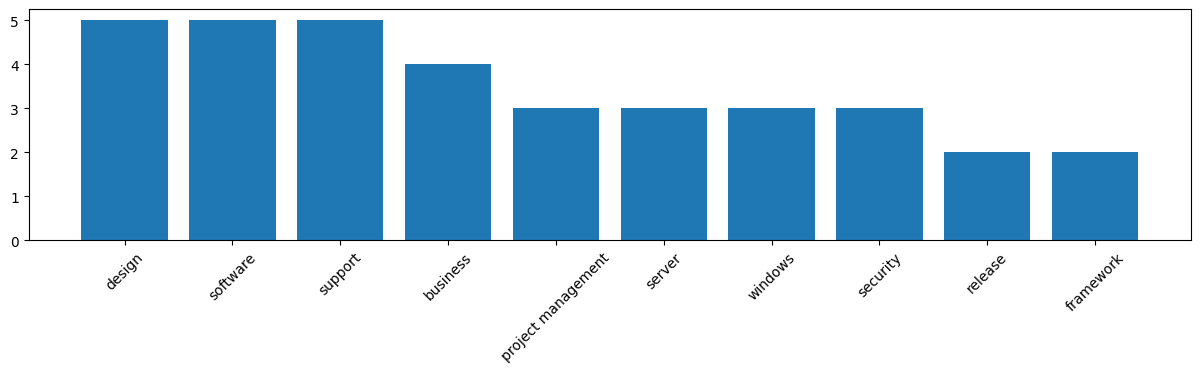

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation=45)

plt.bar(counting.keys(), counting.values())

## 6. Name Entity Recognition

In [31]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[1]
text

'system administrator experience 03/2009 company name 21674 sksit security wireless environment 11/05/12 18640 sksit securing wlans 10/30/12 27481 sksit building securing voip networks 03/20/12 36542 sksit protecting windows 7 against malware vulnerability 03/13/12 30688 sksit physical security 02/03/12 14766 sksit firewall and vpns 01/23/12 34601 kisam service manager sm overview 09/27/11 31699 adding assets kisam asset manager 09/26/11 31856 windows server 2008 system administration 04/01/11 28902 stan security configurations windows 2003 servers 01/31/11 28801 eops test planning procedures os database cots 01/20/11 14763 sksit ans encryption technology 04/09/10 23796 sksit intrusion detection response networked environments 03/22/10 21797 sksit introduce voice over ip 04/15/09 21674 sksit security wireless environment 04/14/09 17090 sksit wireless communication basics 04/10/09 17623 sksit auditing monitoring 05/01/08 21597 sksit ans the fundamental networking 04/25/08 18287 sksit it

In [32]:
doc = nlp(text)
doc

system administrator experience 03/2009 company name 21674 sksit security wireless environment 11/05/12 18640 sksit securing wlans 10/30/12 27481 sksit building securing voip networks 03/20/12 36542 sksit protecting windows 7 against malware vulnerability 03/13/12 30688 sksit physical security 02/03/12 14766 sksit firewall and vpns 01/23/12 34601 kisam service manager sm overview 09/27/11 31699 adding assets kisam asset manager 09/26/11 31856 windows server 2008 system administration 04/01/11 28902 stan security configurations windows 2003 servers 01/31/11 28801 eops test planning procedures os database cots 01/20/11 14763 sksit ans encryption technology 04/09/10 23796 sksit intrusion detection response networked environments 03/22/10 21797 sksit introduce voice over ip 04/15/09 21674 sksit security wireless environment 04/14/09 17090 sksit wireless communication basics 04/10/09 17623 sksit auditing monitoring 05/01/08 21597 sksit ans the fundamental networking 04/25/08 18287 sksit iti

In [33]:
for ent in doc.ents:
    if re.match(r'^SKILL',ent.label_):
        ent.label_ = 'SKILL'
    print(ent.text, ent.label_)

03/2009 DATE
21674 CARDINAL
security SKILL
wireless SKILL
18640 DATE
10/30/12 27481 CARDINAL
03/20/12 36542 CARDINAL
windows SKILL
7 CARDINAL
30688 MONEY
security SKILL
02/03/12 CARDINAL
01/23/12 34601 CARDINAL
09/27/11 31699 CARDINAL
09/26/11 31856 CARDINAL
windows SKILL
server SKILL
2008 DATE
04/01/11 CARDINAL
28902 MONEY
security SKILL
windows SKILL
2003 DATE
01/31/11 28801 CARDINAL
database SKILL
encryption SKILL
04/09/10 CARDINAL
23796 MONEY
21797 CARDINAL
voice over ip SKILL
21674 CARDINAL
security SKILL
wireless SKILL
17090 MONEY
wireless SKILL
17623 MONEY
monitoring SKILL
21597 CARDINAL
04/25/08 18287 CARDINAL
itil problem change ORG
18054 DATE
karta GPE
18064 CARDINAL
karta GPE
security SKILL
13085 CARDINAL
08/03/06 14115 CARDINAL
security SKILL
security SKILL
07/31/06 14780 MONEY
wireless SKILL
security SKILL
15248 CARDINAL
windows SKILL
server SKILL
2003 DATE
04/07/06 17633 CARDINAL
03/24/06 18035 MONEY
03/23/06 18041 CARDINAL
karta GPE
03/22/06 18034 CARDINAL
karta GPE
03/1

In [34]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style='ent', options=options)

### Add email pattern

In [35]:
email_pattern = [{'label': 'EMAIL', 
                  'pattern': [{'TEXT': {'REGEX': '[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'}}]}]
ruler.add_patterns(email_pattern)

### Add education pattern

In [36]:
education_pattern = [
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["bsc", "bachelor", "bachelor's", "b.a", "b.s"]}}, {"IS_ALPHA": True, "OP": "*"}]},
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["msc", "master", "master's", "m.a", "m.s"]}}, {"IS_ALPHA": True, "OP": "*"}]},
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["phd", "ph.d", "doctor", "doctorate"]}}, {"IS_ALPHA": True, "OP": "*"}]}]
ruler.add_patterns(education_pattern)

### Add website_pattern

In [37]:
web_patterns = [
    {"label": "WEBSITE", "pattern": [{"TEXT": {"REGEX": "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"}}]}]
ruler.add_patterns(web_patterns)


### Add mobile_pattern

In [38]:
import re

pattern = r"\+?(\d{2,3})-(\d{2,3})-(\d{3})-(\d{3})"
text = "+66-63-310-919"

match = re.search(pattern, text)
if match:
    print("Match found:", match.group())
else:
    print("No match found.")


Match found: +66-63-310-919


In [39]:
mobile_pattern = [
    # {"label": "MOBILE", "pattern": [{"TEXT": {"REGEX": "(\+?\d{1,3}[-\s.]?)?(\d{1,4}[-\s.]?)?(\d{2,4}[-\s.]?)(\d{2,4}[-\s.]?)(\d{2,4})"}}]},
    {"label": "MOBILE", "pattern": [{"TEXT": {"REGEX": "\+?(\d{7,15})"}}]},
    {"label": "MOBILE", "pattern": [{"TEXT": {"REGEX": "\+?(\d{2,3})-(\d{2,3})-(\d{2,3})-(\d{2,3})"}}]}]
ruler.add_patterns(mobile_pattern)

text = 'this is my number +666339199'   
text2 = '+66-63-310-919'

doc = nlp(text)
doc2 = nlp(text2)

for ent in doc.ents:
    print(ent.text, ent.label_)

for ent in doc2.ents:
    print(ent.text, ent.label_)

+666339199 MOBILE


In [40]:
print(ruler.patterns)

[{'label': 'SKILL', 'pattern': [{'TEXT': '.NET'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': ''}, {'LOWER': 'net'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': '1password'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': '3D'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': '3d'}, {'LOWER': 'reconstruction'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'aboutness'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'data'}, {'LOWER': 'type'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'interpretation'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'machine'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'control'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'method'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'network'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'accounting'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'active'}, {'LOWER': 'appearance'}, {'LOWER': 'model'}]},

## 7. Let's load the PDF - add some realism

In [42]:
from PyPDF2 import PdfReader

reader = PdfReader("./resume/chaklam_resume.pdf")
page   = reader.pages[0]
text   = page.extract_text()

In [43]:
text = preprocessing(text)

In [44]:
text

'chaklam silpasuwanchai email chaklam@ait.asia http://chaklam.com mobile +66 - 63 310 - 9191 http://github.com/chaklam-silpasuwanchai skill •language python java javascript •tool frameworks aws azure pytorch huggingface langchain springboot powerbi •theory natural language processing machine deep learning software engineering architecture human computer interaction brain computer interface selected projects •large language model develop conversational ai legal question answer write assistant ai generate detector university chatbot summarization etc . large language model •bci speller develop real time speller eeg lock patient •non invasive blood glucose measuring use raman spectroscopy utilize raman spectroscopy non - invasively measure blood glucose •medical imaging utilize deep learning language model medical image analysis explanation working experience •asian institute technology pathumthani thailand assistant professor school engineering technology january 2019 present •stamford i

In [45]:
doc = nlp(text)

In [46]:
colors["SKILL"]     = "linear-gradient(90deg, #aa9cfc, #fc9ce7)"
colors["EDUCATION"] = "linear-gradient(90deg, #ffd700, #ff6347)" 
colors["EMAIL"]     = "linear-gradient(90deg, #98fb98, #008000)" 
colors["WEBSITE"]   = "linear-gradient(90deg, #ffff00, #ffdd00)"
colors['MOBILE']    = "linear-gradient(90deg, #ffff00, #FF0000)"

options = {"colors": colors}

displacy.render(doc, style='ent', options=options)